In [1]:
import pandas as pd

In [2]:
# Read the train sheet of the Excel file into a DataFrame
df_train = pd.read_excel('/content/NLP Engineer Assignment Dataset (1) (1) (1) (2) (1) (2) (1).xlsx', sheet_name=1)
# Read the test sheet of the Excel file into a DataFrame
df_test = pd.read_excel('/content/NLP Engineer Assignment Dataset (1) (1) (1) (2) (1) (2) (1).xlsx', sheet_name=2)

In [3]:
df_train.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
8588,�ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...,NaN,No emotion toward brand or product


# EDA

## Tweet_text

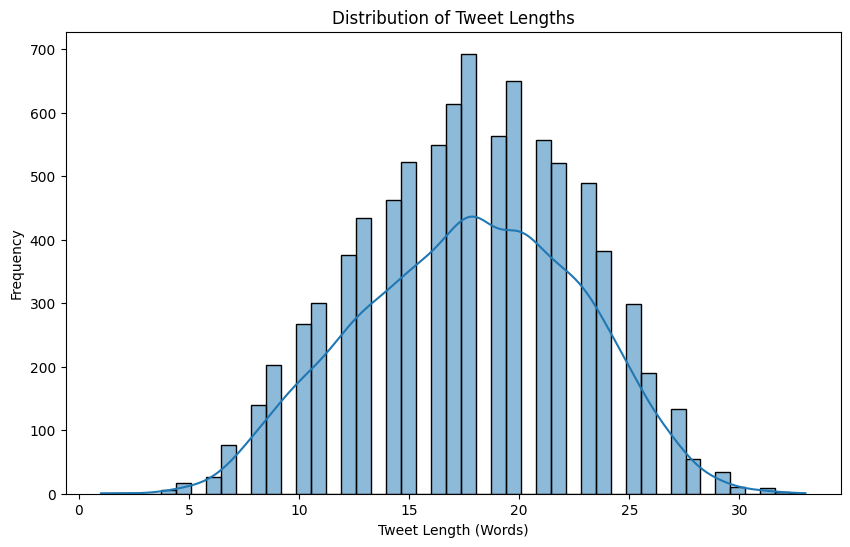

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the length of each tweet
tweet_lengths = df_train['tweet_text'].apply(lambda x: len(str(x).split()))

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(tweet_lengths, kde=True)
plt.xlabel('Tweet Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    stop_words = set(stopwords.words('english'))
    stop_words.update(['rt', 'http', 'co', 'amp','mention','sxsw','@mention'])
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

df_train['clean_tweet_text'] = df_train['tweet_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


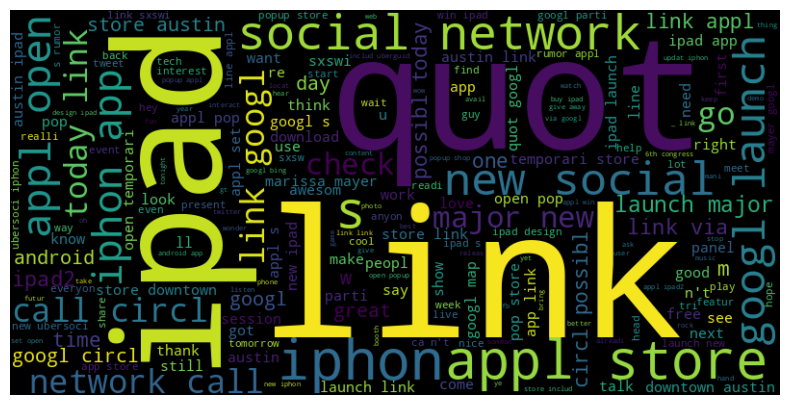

In [6]:
# Word frequency using WordCloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(tweet) for tweet in df_train['clean_tweet_text'])
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## emotion_in_tweet_is_directed_at

In [7]:
df_train['emotion_in_tweet_is_directed_at'].value_counts()

,count
emotion_in_tweet_is_directed_at,
iPad,946
Apple,661
iPad or iPhone App,470
Google,430
iPhone,297
Other Google product or service,293
Android App,81
Android,78
Other Apple product or service,35


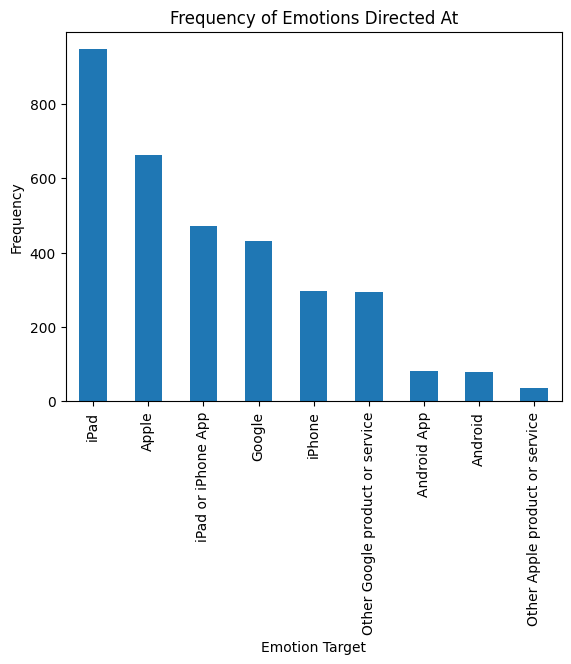

In [8]:
# Create the bar plot
df_train['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar')
plt.xlabel('Emotion Target')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions Directed At')
plt.show()

In [9]:
null_count = df_train['emotion_in_tweet_is_directed_at'].isnull().sum()
print(f"Number of null values in 'emotion_in_tweet_is_directed_at': {null_count}")

Number of null values in 'emotion_in_tweet_is_directed_at': 5298


In [10]:
## Fill Null values ##

import spacy
#Trying to fill with the logic:
## 1. Using NER find either O
nlp = spacy.load("en_core_web_sm") #There are other models too

def infer_target(text):
  doc = nlp(str(text))
  entities = [ent.text for ent in doc.ents if ent.label_ == "ORG" or ent.label_ == "PRODUCT"]
  if entities:
    return entities[0]  # Return the first identified entity
  else:
    return "No Target"

df_train['inferred_target'] = df_train['clean_tweet_text'].apply(infer_target)
df_train['emotion_in_tweet_is_directed_at'].fillna(df_train['inferred_target'], inplace=True)

<ipython-input-10-076110e3a3e0>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['emotion_in_tweet_is_directed_at'].fillna(df_train['inferred_target'], inplace=True)


In [11]:
df_train['emotion_in_tweet_is_directed_at'].value_counts()

,count
emotion_in_tweet_is_directed_at,
No Target,4266
iPad,946
Apple,661
iPad or iPhone App,470
Google,430
...,...
p @ #,1
# circl #,1
hah !,1


### Fill the null values
#### Majority of the values in 'emotion_in_tweet_is_directed_at' are null.

In [12]:
df_test.tail(3)

,Tweet
501,@mention You could buy a new iPad 2 tmrw at th...
502,"Guys, if you ever plan on attending #SXSW, you..."
503,&quot;Do you know what Apple is really good at...


## is_there_an_emotion_directed_at_a_brand_or_product

In [13]:
df_train['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
No emotion toward brand or product,5389
Positive emotion,2672
Negative emotion,519
I can't tell,9


# Fine-tuning

In [14]:
!pip install -q transformers==4.46.3 sentencepiece safetensors

In [15]:
import joblib
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [16]:
# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

## Fine-tune training

In [17]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = torch.argmax(torch.tensor(logits), dim=-1)
  acc = accuracy_score(labels, predictions)
  f1 = f1_score(labels, predictions, average="weighted")
  return {"accuracy": acc, "f1": f1}

In [18]:
class fine_tuning_class:
  def __init__(self, model_name, labels):
    self.tokenizer = AutoTokenizer.from_pretrained(model_name)
    self.model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels), trust_remote_code=True,ignore_mismatched_sizes=True)
    self.training_args = TrainingArguments(
      output_dir="./results",
      evaluation_strategy="epoch",
      save_strategy="epoch",
      logging_dir="./logs",
      per_device_train_batch_size=16,
      per_device_eval_batch_size=16,
      num_train_epochs=3,
      learning_rate=5e-5,
      weight_decay=0.01,
      logging_steps=10,
      save_total_limit=2,
      load_best_model_at_end=True,
      metric_for_best_model="accuracy",
      greater_is_better=True,
      report_to="none")
    self.label_encoder = LabelEncoder()
    self.max_length = 40
    self.test_size = 0.2

  def split_dataset(self, df):
    # Encode labels
    df['encoded_labels'] = self.label_encoder.fit_transform(df['labels'])
    # Split the data into train and validation sets
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        df['content'].tolist(),
        df['encoded_labels'].tolist(),
        test_size=self.test_size,
        random_state=42
    )
    return train_texts, val_texts, train_labels, val_labels

  def convert_to_encodings(self,texts):
    encodings = self.tokenizer(texts, truncation=True, padding=True, max_length = self.max_length)
    return encodings

  def fine_tune(self, df):
    train_texts, val_texts, train_labels, val_labels = self.split_dataset(df)
    train_encodings = self.convert_to_encodings(train_texts)
    val_encodings = self.convert_to_encodings(val_texts)
    # Create datasets
    train_dataset = CustomDataset(train_encodings, train_labels)
    val_dataset = CustomDataset(val_encodings, val_labels)

    # Create Trainer
    trainer = Trainer(
        model=self.model,
        args=self.training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=self.tokenizer,
        compute_metrics=compute_metrics
    )
    trainer.train()
    # Save the model and tokenizer
    self.model.save_pretrained(f"./fine_tuned_{model_name.replace('/','').split('-')}")
    self.tokenizer.save_pretrained(f"./fine_tuned_tokenizer_{model_name.replace('/','').split('-')}")
    joblib.dump(self.label_encoder, f"./label_encoder_{model_name.replace('/','').split('-')}.pkl")

    print("Fine-tuning completed. Model and tokenizer saved.")
    return


## Fine-tune Testing

In [19]:
class testing_fine_tuned_model:
  def __init__(self, model_name):
    self.tokenizer = AutoTokenizer.from_pretrained(f"./fine_tuned_tokenizer_{model_name.replace('/','').split('-')}")
    self.model = AutoModelForSequenceClassification.from_pretrained(f"./fine_tuned_{model_name.replace('/','').split('-')}")
    self.label_encoder = joblib.load(f"./label_encoder_{model_name.replace('/','').split('-')}.pkl")
    self.max_length = 128 #make sure equal to train
    self.batch_size = 32

  def test(self,df):
    # Encode labels
    df['encoded_labels'] = self.label_encoder.transform(df['labels'])
    df_texts = df['content'].tolist()
    df_labels = df['encoded_labels'].tolist()
    df_encodings = self.tokenizer(df_texts, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
    # Create dataset and dataloader
    df_dataset = CustomDataset(df_encodings, df_labels)
    df_dataloader = DataLoader(df_dataset, batch_size=self.batch_size, shuffle=True)
    # Evaluate model
    test_model = self.model
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
      for batch in df_dataloader:
        inputs = {key: val for key, val in batch.items() if key != 'labels'}
        labels = batch['labels']
        outputs = test_model(**inputs)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())
    return all_preds, all_labels

## Training and testing

In [20]:
def verify_df(file_path):
  try:
      train_df = pd.read_csv(file_path)
      # Check if 'content' and 'labels' columns exist
      if not all(col in train_df.columns for col in ['content', 'labels']):
          print("Error: 'content' and/or 'labels' columns not found in the CSV file.")
          return
      else:
          print("The CSV file has 'content' and 'labels' columns.")
          return train_df

  except FileNotFoundError:
      print(f"Error: File {file_path} not found.")
  except pd.errors.EmptyDataError:
      print("Error: The CSV file is empty.")
  except pd.errors.ParserError:
      print("Error: Could not parse the CSV file.")

In [26]:
# Load dataset
# Read the train sheet of the Excel file into a DataFrame
train_df = pd.read_excel('/content/NLP Engineer Assignment Dataset (1) (1) (1) (2) (1) (2) (1).xlsx', sheet_name=1)
train_df = train_df.rename(columns={'tweet_text': 'content', 'is_there_an_emotion_directed_at_a_brand_or_product': 'labels'})
# Read the test sheet of the Excel file into a DataFrame
test_df = pd.read_excel('/content/NLP Engineer Assignment Dataset (1) (1) (1) (2) (1) (2) (1).xlsx', sheet_name=2)
test_df = test_df.rename(columns={'Tweet': 'content'})

train_df = train_df[train_df['content'].notna()]
test_df = test_df[test_df['content'].notna()]
test_df['labels'] = 0
#model_name = 'amberoad/bert-multilingual-passage-reranking-msmarco'
model_name = 'bert-base-multilingual-cased'


if len(train_df):
  fine_tuning = fine_tuning_class(model_name, train_df['labels'].unique())
  fine_tuning.fine_tune(train_df)

test_df['labels'] = train_df['labels'].unique()[0] #Filling random value. Else True label will be there
if len(test_df):
  test = testing_fine_tuned_model(model_name)
  all_preds, all_labels = test.test(test_df)
  # Calculate F1 score
  # f1 = f1_score(all_labels, all_preds, average="weighted")
  # print(f"F1 Score: {f1}")
  predicted_labels = test.label_encoder.inverse_transform(all_preds)
  test_df['predicted_labels'] = predicted_labels
  print(test_df[['content', 'predicted_labels']])

<ipython-input-16-1bda1c4d6c5c>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


                                               content  \
0    Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...   
1    Again? RT @mention Line at the Apple store is ...   
2    Boooo! RT @mention Flipboard is developing an ...   
3    Thanks to @mention for publishing the news of ...   
4    ���@mention &quot;Apple has opened a pop-up st...   
..                                                 ...   
499  Hey is anyone doing #sxsw signing up for the g...   
500  @mention you can buy my used iPad and I'll pic...   
501  @mention You could buy a new iPad 2 tmrw at th...   
502  Guys, if you ever plan on attending #SXSW, you...   
503  &quot;Do you know what Apple is really good at...   

                       predicted_labels  
0    No emotion toward brand or product  
1    No emotion toward brand or product  
2                      Positive emotion  
3    No emotion toward brand or product  
4    No emotion toward brand or product  
..                                  ...  
499  No e

# Data Augmentation

In [ ]:
import nlpaug.augmenter.word as naw

# Initialize the augmenter
aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-cased', action="substitute")

# Example usage: augment each text in 'content' column for each class
augmented_data = []
for label in train_df['labels'].unique():
    subset = train_df[train_df['labels'] == label]
    for index, row in subset.iterrows():
        original_text = row['content']
        # Augment text up to 3 times
        for _ in range(3):
            augmented_text = aug.augment(original_text)
            augmented_data.append({'content': augmented_text, 'labels': label})

# Convert augmented data to DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Concatenate with original dataframe
train_df = pd.concat([train_df, augmented_df], ignore_index=True)
